In [1]:
#IMPORT BASIC LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

#IMPORT NLP LIBRARY
import nltk
import string

In [2]:
# LOAD DATASET INTO PANDAS DATAFRAME
path1 = "/content/restaurant_reviews-v2-1.xlsx"
df = pd.read_excel(path1)

df.head()

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# KEEP ONLY NNECESSARY COLUMNS
df = df[['Review', 'positive=1/negative=0']]

In [4]:
# DROP Duplicates
df.drop_duplicates()

,Review,positive=1/negative=0
0,Great food and great atmosphere! The chicken t...,1
1,I had heard good things about Tikka Shak so I ...,0
2,I was driving by tikka shack one day and decid...,0
3,Tikka Shack had the most modern and up-to-date...,1
4,Today is the third time I've come to India Pal...,1
...,...,...
255,I usually don't eat outside very often and Tik...,1
256,The outside of this restaurant in this little ...,1
257,The food served at this place was at best medi...,0
258,Their food was worth the wait. Though it took ...,1


In [5]:
# PREPROCESSING: remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

df = df.reset_index(drop=True)

df['reduced'] = ""
stopWords = set(stopwords.words('english'))

for index, row in df.iterrows():
    temp = row['Review']
    tokens_without_punct = nltk.word_tokenize(''.join(filter(lambda x: x not in string.punctuation, temp)))
    removal = [word for word in tokens_without_punct if word.lower() not in stopWords]
    result = ' '.join(removal)

    df.at[index,'reduced'] = result

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Review,positive=1/negative=0,reduced
0,Great food and great atmosphere! The chicken t...,1,Great food great atmosphere chicken tikka masa...
1,I had heard good things about Tikka Shak so I ...,0,heard good things Tikka Shak decided go ahead ...
2,I was driving by tikka shack one day and decid...,0,driving tikka shack one day decided give try l...
3,Tikka Shack had the most modern and up-to-date...,1,Tikka Shack modern uptodate atmosphere restaur...
4,Today is the third time I've come to India Pal...,1,Today third time Ive come India Palace Indian ...


In [6]:
# PREPROCESSING: perform lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')

df = df.reset_index(drop=True)

df['lemmatized'] = ""

for index, row in df.iterrows():
    temp = row['reduced']
    doc = nlp(temp)
    tokens = []
    for token in doc:
      tokens.append(token)
    lemma = " ".join([token.lemma_ for token in doc])

    df.at[index,'lemmatized'] = lemma

df.head()

,Review,positive=1/negative=0,reduced,lemmatized
0,Great food and great atmosphere! The chicken t...,1,Great food great atmosphere chicken tikka masa...,great food great atmosphere chicken tikka masa...
1,I had heard good things about Tikka Shak so I ...,0,heard good things Tikka Shak decided go ahead ...,hear good thing Tikka Shak decide go ahead giv...
2,I was driving by tikka shack one day and decid...,0,driving tikka shack one day decided give try l...,drive tikka shack one day decide give try lunc...
3,Tikka Shack had the most modern and up-to-date...,1,Tikka Shack modern uptodate atmosphere restaur...,tikka shack modern uptodate atmosphere restaur...
4,Today is the third time I've come to India Pal...,1,Today third time Ive come India Palace Indian ...,today third time I ve come India Palace Indian...


In [ ]:
# CHECK CLASS DISTRIBUTION
df['positive=1/negative=0'].value_counts()

1    135
0    125
Name: positive=1/negative=0, dtype: int64

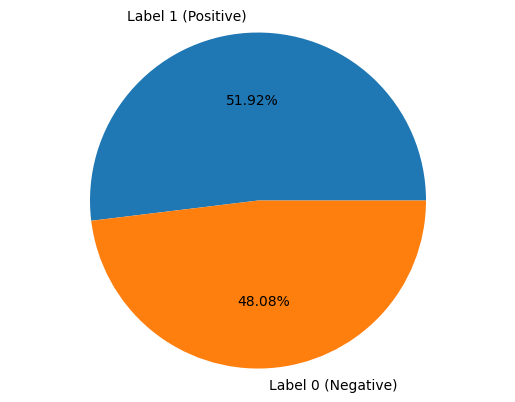

In [ ]:
#VISUALISE CLASS DISTRIBUTION

plt.pie(df['positive=1/negative=0'].value_counts(),
        labels=['Label 1 (Positive)', 'Label 0 (Negative)'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()

In [7]:
# SEPARATE FEATURES AND TARGET VARIABLES
X_raw = df["Review"]
y_raw = df["positive=1/negative=0"]

X_prep = df["lemmatized"]
y_prep = df["positive=1/negative=0"].copy()

In [8]:
# TRAIN-TEST SPLIT 75-10-15 SCHEME.
from sklearn.model_selection import train_test_split

XR_train, XR_test , yR_train, yR_test = train_test_split(X_raw,
                                                     y_raw,
                                                     test_size=0.15,
                                                     random_state=0,
                                                     stratify=y_raw)

XR_train, XR_val , yR_train, yR_val = train_test_split(XR_train,
                                                     yR_train,
                                                     test_size=0.10,
                                                     random_state=0,
                                                     stratify=yR_train)

XP_train, XP_test , yP_train, yP_test = train_test_split(X_prep,
                                                     y_prep,
                                                     test_size=0.15,
                                                     random_state=0,
                                                     stratify=y_prep)

XP_train, XP_val , yP_train, yP_val = train_test_split(XP_train,
                                                     yP_train,
                                                     test_size=0.10,
                                                     random_state=0,
                                                     stratify=yP_train)

In [10]:
# CREATE SPARSE WORD REPRESENTSTIONS: term frequency - inverse document frequency

# method for creating vocab

'''def createVocabulary_TFIDF(dataframe):
  vocab = dataframe.to_list()
  token_set = set()

  for doc in vocab:
    token = doc.split(' ')
    token_set = token_set.union(set(token))

  return token_set

# create separate corpuses for raw and preprocessed reviews

raw_corpus = createVocabulary_TFIDF(X_raw)
prep_corpus = createVocabulary_TFIDF(X_prep)

print('Raw Vocabulary size:',len(raw_corpus))
print('Preprocessed Vocabulary size:',len(prep_corpus))'''

# train TF-IDF vectorizer and generate embeddings

from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

tf_uni = TfidfVectorizer()
#tf_uni.fit_transform(raw_corpus)

XR_train_tf = tf_uni.fit_transform(XR_train)
pickle.dump(tf_uni, open('tf_uni.pkl', 'wb'))

XR_train_tf = XR_train_tf.toarray()

XR_val_tf =  tf_uni.transform(XR_val).toarray()
XR_test_tf =  tf_uni.transform(XR_test).toarray()

tf_uni_p = TfidfVectorizer()
#tf_uni.fit_transform(prep_corpus)

XP_train_tf = tf_uni_p.fit_transform(XP_train)
XP_train_tf = XP_train_tf.toarray()

pickle.dump(tf_uni_p, open('tf_uni_prep.pkl', 'wb'))

XP_val_tf =  tf_uni_p.transform(XP_val).toarray()
XP_test_tf =  tf_uni_p.transform(XP_test).toarray()

In [ ]:
# CHECK SIZE OF SPARSE VECTORS
print('Raw review sparse embedding size:', XR_train_tf.shape)
print('Preprocessed review sparse embedding size:', XP_train_tf.shape)

Raw review sparse embedding size: (198, 1678)
Preprocessed review sparse embedding size: (198, 1394)


In [ ]:
# CREATE DENSE VECTORS: 100d GloVe trained on Twitter data

import nltk
from nltk.tokenize import word_tokenize

def createVocabulary_Glove(dataframe):
  vocab = []
  for i in dataframe:
    tokens = [j.lower() for j in word_tokenize(i)]
    vocab.append(tokens)
  return vocab

raw_corpus_glove = createVocabulary_Glove(X_raw)
prep_corpus_glove = createVocabulary_Glove(X_prep)

from functools import reduce
raw_corpus_len = reduce(lambda count, l: count + len(l), raw_corpus_glove, 0)
prep_corpus_len = reduce(lambda count, l: count + len(l), prep_corpus_glove, 0)

print("Raw corpus length: ", raw_corpus_len)
print("Prepped corpus length: ", prep_corpus_len)

Raw corpus length:  18603
Prepped corpus length:  8650


In [ ]:
# PAD DATASET TO MATCH THE GLOVE EMBEDDING SIZE

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

embedding_size = 100
tokenizer_R = Tokenizer(num_words = raw_corpus_len)

tokenizer_R.fit_on_texts(XR_train)
pickle.dump(tokenizer_R, open('glove_tokenizer.pkl', 'wb'))

XR_train_seq = tokenizer_R.texts_to_sequences(XR_train)
XR_train_pad = pad_sequences(XR_train_seq, maxlen = embedding_size, truncating = "post", padding = "post")
XR_val_seq = tokenizer_R.texts_to_sequences(XR_val)
XR_val_pad = pad_sequences(XR_val_seq, maxlen = embedding_size, truncating = "post", padding = "post")
XR_test_seq = tokenizer_R.texts_to_sequences(XR_test)
XR_test_pad = pad_sequences(XR_test_seq, maxlen = embedding_size, truncating = "post", padding = "post")

tokenizer_P = Tokenizer(num_words = prep_corpus_len)
tokenizer_P.fit_on_texts(XP_train)

XP_train_seq = tokenizer_P.texts_to_sequences(XP_train)
XP_train_pad = pad_sequences(XP_train_seq, maxlen = embedding_size, truncating = "post", padding = "post")
XP_val_seq = tokenizer_R.texts_to_sequences(XP_val)
XP_val_pad = pad_sequences(XP_val_seq, maxlen = embedding_size, truncating = "post", padding = "post")
XP_test_seq = tokenizer_P.texts_to_sequences(XP_test)
XP_test_pad = pad_sequences(XP_test_seq, maxlen = embedding_size, truncating = "post", padding = "post")

In [ ]:
# CREATE WORD INDEX FROM TOKENIZER
raw_word_index = tokenizer_R.word_index
prep_word_index = tokenizer_P.word_index

In [ ]:
# CREATE GLOVE EMBEDDING MATRIX

glove_vectors = {}
with open("/content/glove.twitter.27B.100d.txt", "r") as f:
  for line in f:
    x = line.split()
    word = x[0]
    vector = np.asarray(x[1:], "float32")
    glove_vectors[word] = vector
f.close()

In [ ]:
# GENERATE WORD REPRESENTATION OF DATASET USING GLOVE EMBEDDING MATRIX

n_r = len(raw_word_index) + 1
n_p = len(prep_word_index) + 1

rep_matrix_raw = np.zeros((n_r, 100))
rep_matrix_prep = np.zeros((n_p, 100))

for w, i in raw_word_index.items():
  word_rep = glove_vectors.get(w)
  if i < n_r:
    if word_rep is not None:
      rep_matrix_raw[i] = word_rep

for w, i in prep_word_index.items():
  word_rep = glove_vectors.get(w)
  if i < n_r:
    if word_rep is not None:
      rep_matrix_prep[i] = word_rep

In [ ]:
# CHECK IF WORD REPRESENTATIONS MADE PROPERLY
raw_word_index["good"]

21

In [ ]:
# CHECK IF WORD REPRESENTATIONS MADE PROPERLY
glove_vectors.get("good")

array([ 9.1552e-02,  9.3336e-02, -2.8113e-02,  3.6990e-01,  1.8956e-01,
        4.3191e-01,  1.0266e-01,  3.4092e-01, -3.8717e-01,  5.0772e-02,
       -4.8289e-01, -3.7883e-01, -5.0020e+00, -2.7927e-01, -1.4578e-01,
       -1.0818e-01,  3.9178e-01, -4.5798e-01, -5.4712e-01, -2.0868e-01,
       -3.3495e-02,  1.0765e-01, -1.7093e-01, -1.0107e-01,  1.1071e-01,
       -1.7558e-01, -3.5739e-01,  1.5897e-01,  7.9770e-02, -9.7594e-01,
       -3.9054e-01,  1.5097e-01, -5.6339e-01,  5.0047e-01,  1.7436e-01,
        6.8966e-01,  2.6879e-01, -4.7430e-01, -1.4947e-02,  2.3483e-01,
       -9.4609e-01, -5.5384e-02,  2.7673e-01,  4.1185e-01,  3.5373e-01,
        3.6709e-01, -1.4923e-01, -6.6414e-02,  2.5766e-01, -3.6882e-03,
       -6.6522e-01,  7.5965e-02, -3.0112e-01, -1.5115e-01,  3.5540e-01,
        5.9782e-01, -2.0585e-01, -4.8643e-01,  6.6179e-01, -1.3902e-01,
        2.4042e-02, -9.1297e-01, -2.1795e-01,  4.9977e-01,  4.9224e-02,
       -4.8337e-01, -5.1529e-01, -6.8428e-01, -2.4887e-01,  5.98

In [ ]:
# CHECK IF WORD REPRESENTATIONS MADE PROPERLY
(rep_matrix_raw[21] == glove_vectors.get("good")).all()

True

In [ ]:
# TRAIN MODELS: LSTM with dense representations of raw data, no dropout

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

lstm_dense_raw = Sequential()

lstm_dense_raw.add(Embedding(n_r, embedding_size, embeddings_initializer = Constant(rep_matrix_raw), input_length = embedding_size, trainable = False))
lstm_dense_raw.add(LSTM(embedding_size, return_sequences = True))
lstm_dense_raw.add(LSTM(embedding_size))
lstm_dense_raw.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_dense_raw.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_dense_raw.summary())

history = lstm_dense_raw.fit(XR_train_pad, yR_train, epochs = 20, validation_data = (XR_val_pad, yR_val), verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          173400    
                                                                 
 lstm (LSTM)                 (None, 100, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 334301 (1.28 MB)
Trainable params: 160901 (628.52 KB)
Non-trainable params: 173400 (677.34 KB)
_________________________________________________________________
None
Epoch 1/20
7/7 [==============================] - 10s 211ms/step - loss: 0.6961 - accuracy: 0.4899 - val_loss: 0.6880 - val_accuracy: 0.5217

In [ ]:
# CHECK ACCURACY: LSTM with dense representations of raw data, no dropout
s1 = lstm_dense_raw.evaluate(XR_test_pad, yR_test, verbose=0)
print("Accuracy: %.2f%%" % (s1[1]*100))

Accuracy: 76.92%


In [ ]:
# TRAIN MODELS: LSTM with dense representations of processed data, no dropout
lstm_dense_prep = Sequential()

lstm_dense_prep.add(Embedding(n_p, embedding_size, embeddings_initializer = Constant(rep_matrix_prep), input_length = embedding_size, trainable = False))
lstm_dense_prep.add(LSTM(embedding_size, return_sequences = True))
lstm_dense_prep.add(LSTM(embedding_size))
lstm_dense_prep.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_dense_prep.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_dense_prep.summary())

history = lstm_dense_prep.fit(XP_train_pad, yP_train, epochs = 20, validation_data = (XP_val_pad, yP_val), verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          141100    
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 302001 (1.15 MB)
Trainable params: 160901 (628.52 KB)
Non-trainable params: 141100 (551.17 KB)
_________________________________________________________________
None
Epoch 1/20
7/7 [==============================] - 5s 211ms/step - loss: 0.6937 - accuracy: 0.4949 - val_loss: 0.6954 - val_accuracy: 0.434

In [ ]:
# SET INPUT SIZES FOR MODEL TRAINING

num_words_raw = raw_corpus_len + 1
num_words_prep = prep_corpus_len + 1

raw_tf_embedding_dim = XR_train_tf.shape[1]
prep_tf_embedding_dim = XP_train_tf.shape[1]

In [ ]:
# TRAIN MODEL: LSTM with sparse representations of raw data, no dropout
lstm_sparse_raw = Sequential()

lstm_sparse_raw.add(Embedding(num_words_raw, raw_tf_embedding_dim, input_length = raw_tf_embedding_dim, trainable = False))
lstm_sparse_raw.add(LSTM(raw_tf_embedding_dim, return_sequences = True))
lstm_sparse_raw.add(LSTM(raw_tf_embedding_dim))
lstm_sparse_raw.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_sparse_raw.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_sparse_raw.summary())

history = lstm_sparse_raw.fit(XR_train_tf, yR_train, epochs = 20, validation_data = (XR_val_tf, yR_val), verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1678, 1678)        31217512  
                                                                 
 lstm_4 (LSTM)               (None, 1678, 1678)        22532184  
                                                                 
 lstm_5 (LSTM)               (None, 1678)              22532184  
                                                                 
 dense_2 (Dense)             (None, 1)                 1679      
                                                                 
Total params: 76283559 (291.00 MB)
Trainable params: 45066047 (171.91 MB)
Non-trainable params: 31217512 (119.09 MB)
_________________________________________________________________
None
Epoch 1/20
7/7 [==============================] - 38s 5s/step - loss: 0.7231 - accuracy: 0.5202 - val_loss: 0.6926 - val_accuracy:

In [ ]:
# TRAIN MODELS: LSTM with sparse representations of processed data, no dropout
lstm_sparse_prep = Sequential()

lstm_sparse_prep.add(Embedding(num_words_prep, prep_tf_embedding_dim, input_length = prep_tf_embedding_dim, trainable = False))
lstm_sparse_prep.add(LSTM(prep_tf_embedding_dim, return_sequences = True))
lstm_sparse_prep.add(LSTM(prep_tf_embedding_dim))
lstm_sparse_prep.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_sparse_prep.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_sparse_prep.summary())

history = lstm_sparse_prep.fit(XP_train_tf, yP_train, epochs = 20, validation_data = (XP_val_tf, yP_val), verbose = 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1394, 1394)        12059494  
                                                                 
 lstm_6 (LSTM)               (None, 1394, 1394)        15551464  
                                                                 
 lstm_7 (LSTM)               (None, 1394)              15551464  
                                                                 
 dense_3 (Dense)             (None, 1)                 1395      
                                                                 
Total params: 43163817 (164.66 MB)
Trainable params: 31104323 (118.65 MB)
Non-trainable params: 12059494 (46.00 MB)
_________________________________________________________________
None
Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 0.7113 - accuracy: 0.5303 - val_loss: 0.6984 - val_accuracy: 

In [ ]:
# TRAIN MODEL: LSTM with dense representations of raw data, with dropout
lstm_dense_raw_drop = Sequential()

lstm_dense_raw_drop.add(Embedding(n_r, embedding_size, embeddings_initializer = Constant(rep_matrix_raw), input_length = embedding_size, trainable = False))
lstm_dense_raw_drop.add(LSTM(embedding_size, return_sequences = True))
lstm_dense_raw_drop.add(Dropout(0.1))
lstm_dense_raw_drop.add(LSTM(embedding_size))
lstm_dense_raw_drop.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_dense_raw_drop.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_dense_raw_drop.summary())

history = lstm_dense_raw_drop.fit(XR_train_pad, yR_train, epochs = 20, validation_data = (XR_val_pad, yR_val), verbose = 1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          173400    
                                                                 
 lstm_8 (LSTM)               (None, 100, 100)          80400     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 334301 (1.28 MB)
Trainable params: 160901 (628.52 KB)
Non-trainable params: 173400 (677.34 KB)
_________________________________________________________________
None
Epoch 

In [ ]:
# TRAIN MODEL: LSTM with dense representations of processed data, with dropout

lstm_dense_prep_drop = Sequential()

lstm_dense_prep_drop.add(Embedding(n_p, embedding_size, embeddings_initializer = Constant(rep_matrix_prep), input_length = embedding_size, trainable = False))
lstm_dense_prep_drop.add(LSTM(embedding_size, return_sequences = True))
lstm_dense_prep_drop.add(Dropout(0.1))
lstm_dense_prep_drop.add(LSTM(embedding_size))
lstm_dense_prep_drop.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_dense_prep_drop.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_dense_prep_drop.summary())

history = lstm_dense_prep_drop.fit(XP_train_pad, yP_train, epochs = 20, validation_data = (XP_val_pad, yP_val), verbose = 1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          141100    
                                                                 
 lstm_10 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 302001 (1.15 MB)
Trainable params: 160901 (628.52 KB)
Non-trainable params: 141100 (551.17 KB)
_________________________________________________________________
None
Epoch 

In [ ]:
# TRAIN MODEL: LSTM with sparse representations of raw data, with dropout

lstm_sparse_raw_drop = Sequential()

lstm_sparse_raw_drop.add(Embedding(num_words_raw, raw_tf_embedding_dim, input_length = raw_tf_embedding_dim, trainable = False))
lstm_sparse_raw_drop.add(LSTM(raw_tf_embedding_dim, return_sequences = True))
lstm_sparse_raw_drop.add(Dropout(0.1))
lstm_sparse_raw_drop.add(LSTM(raw_tf_embedding_dim))
lstm_sparse_raw_drop.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_sparse_raw_drop.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_sparse_raw_drop.summary())

history = lstm_sparse_raw_drop.fit(XR_train_tf, yR_train, epochs = 20, validation_data = (XR_val_tf, yR_val), verbose = 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1678, 1678)        31217512  
                                                                 
 lstm_12 (LSTM)              (None, 1678, 1678)        22532184  
                                                                 
 dropout_2 (Dropout)         (None, 1678, 1678)        0         
                                                                 
 lstm_13 (LSTM)              (None, 1678)              22532184  
                                                                 
 dense_6 (Dense)             (None, 1)                 1679      
                                                                 
Total params: 76283559 (291.00 MB)
Trainable params: 45066047 (171.91 MB)
Non-trainable params: 31217512 (119.09 MB)
_________________________________________________________________
Non

In [ ]:
# TRAIN MODEL: LSTM with sparse representations of processed data, with dropout

lstm_sparse_prep_drop = Sequential()

lstm_sparse_prep_drop.add(Embedding(num_words_prep, prep_tf_embedding_dim, input_length = prep_tf_embedding_dim, trainable = False))
lstm_sparse_prep_drop.add(LSTM(prep_tf_embedding_dim, return_sequences = True))
lstm_sparse_prep_drop.add(Dropout(0.1))
lstm_sparse_prep_drop.add(LSTM(prep_tf_embedding_dim))
lstm_sparse_prep_drop.add(Dense(1, activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
lstm_sparse_prep_drop.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

print(lstm_sparse_prep_drop.summary())

history = lstm_sparse_prep_drop.fit(XP_train_tf, yP_train, epochs = 20, validation_data = (XP_val_tf, yP_val), verbose = 1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1394, 1394)        12059494  
                                                                 
 lstm_14 (LSTM)              (None, 1394, 1394)        15551464  
                                                                 
 dropout_3 (Dropout)         (None, 1394, 1394)        0         
                                                                 
 lstm_15 (LSTM)              (None, 1394)              15551464  
                                                                 
 dense_7 (Dense)             (None, 1)                 1395      
                                                                 
Total params: 43163817 (164.66 MB)
Trainable params: 31104323 (118.65 MB)
Non-trainable params: 12059494 (46.00 MB)
_________________________________________________________________
None

In [ ]:
# CHECK ACCURACY: all LSTM models

s1 = lstm_dense_raw.evaluate(XR_test_pad, yR_test, verbose=0)
print("lstm_dense_raw Accuracy: %.2f%%" % (s1[1]*100))

s2 = lstm_dense_prep.evaluate(XR_test_pad, yR_test, verbose=0)
print("lstm_dense_prep Accuracy: %.2f%%" % (s2[1]*100))

s3 = lstm_sparse_raw.evaluate(XR_test_tf, yR_test, verbose=0)
print("lstm_sparse_raw Accuracy: %.2f%%" % (s3[1]*100))

s4 = lstm_sparse_prep.evaluate(XR_test_tf, yR_test, verbose=0)
print("lstm_sparse_prep Accuracy: %.2f%%" % (s4[1]*100))

s5 = lstm_dense_raw_drop.evaluate(XR_test_pad, yR_test, verbose=0)
print("lstm_dense_raw_drop Accuracy: %.2f%%" % (s5[1]*100))

s6 = lstm_dense_prep_drop.evaluate(XR_test_pad, yR_test, verbose=0)
print("lstm_dense_prep_drop Accuracy: %.2f%%" % (s6[1]*100))

s7 = lstm_sparse_raw_drop.evaluate(XR_test_tf, yR_test, verbose=0)
print("lstm_sparse_raw_drop Accuracy: %.2f%%" % (s7[1]*100))

s8 = lstm_sparse_prep_drop.evaluate(XR_test_tf, yR_test, verbose=0)
print("lstm_sparse_prep_drop Accuracy: %.2f%%" % (s8[1]*100))


lstm_dense_raw Accuracy: 76.92%
lstm_dense_prep Accuracy: 33.33%
lstm_sparse_raw Accuracy: 51.28%
lstm_sparse_prep Accuracy: 51.28%
lstm_dense_raw_drop Accuracy: 84.62%
lstm_dense_prep_drop Accuracy: 38.46%
lstm_sparse_raw_drop Accuracy: 48.72%
lstm_sparse_prep_drop Accuracy: 51.28%


In [ ]:
# SAVE MODELS

import pickle

lstm_dense_raw_file = "lstm_dense_raw_model.pkl"
lstm_dense_prep_file = "lstm_dense_prep_model.pkl"
lstm_sparse_raw_file = "lstm_sparse_raw_model.pkl"
lstm_sparse_prep_file = "lstm_sparse_prep_model.pkl"

lstm_dense_raw_drop_file = "lstm_dense_raw_drop_model.pkl"
lstm_dense_prep_drop_file = "lstm_dense_prep_drop_model.pkl"
lstm_sparse_raw_drop_file = "lstm_sparse_raw_drop_model.pkl"
lstm_sparse_prep_drop_file = "lstm_sparse_prep_drop_model.pkl"

with open(lstm_dense_raw_file, 'wb') as file:
    pickle.dump(lstm_dense_raw, file)

with open(lstm_dense_prep_file, 'wb') as file:
    pickle.dump(lstm_dense_prep, file)

with open(lstm_sparse_raw_file, 'wb') as file:
    pickle.dump(lstm_sparse_raw, file)

with open(lstm_sparse_prep_file, 'wb') as file:
    pickle.dump(lstm_sparse_prep, file)

with open(lstm_dense_raw_drop_file, 'wb') as file:
    pickle.dump(lstm_dense_raw_drop, file)

with open(lstm_dense_prep_drop_file, 'wb') as file:
    pickle.dump(lstm_dense_prep_drop, file)

with open(lstm_sparse_raw_drop_file, 'wb') as file:
    pickle.dump(lstm_sparse_raw_drop, file)

with open(lstm_sparse_prep_drop_file, 'wb') as file:
    pickle.dump(lstm_sparse_prep_drop, file)

In [ ]:
# SAVE MODELS
lstm_dense_raw_drop.save('lstm_dense_raw_drop.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# SAVE MODELS
lstm_dense_raw.save('lstm_dense_raw.h5')
lstm_dense_prep.save('lstm_dense_prep.h5')
lstm_sparse_raw.save('lstm_sparse_raw.h5')
lstm_sparse_prep.save('lstm_sparse_prep.h5')
lstm_dense_prep_drop.save('lstm_dense_prep_drop.h5')
lstm_sparse_raw_drop.save('lstm_sparse_raw_drop.h5')
lstm_sparse_prep_drop.save('lstm_sparse_prep_drop.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
